
# Sohaib Nasir - Fraud Detection Analysis on gas and electricty theft dataset. Feel free to edit, add and expand on the code

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [328]:
df = pd.read_csv("df.csv")

In [329]:
df = df[:100000]

Q1

In [330]:
df.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


In [331]:
df.index

RangeIndex(start=0, stop=100000, step=1)

In [332]:
df.columns

Index(['0', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'Class', 'theft'],
      dtype='object')

In [333]:
print(df.isnull().sum())

0                                             0
Electricity:Facility [kW](Hourly)             0
Fans:Electricity [kW](Hourly)                 0
Cooling:Electricity [kW](Hourly)              0
Heating:Electricity [kW](Hourly)              0
InteriorLights:Electricity [kW](Hourly)       0
InteriorEquipment:Electricity [kW](Hourly)    0
Gas:Facility [kW](Hourly)                     0
Heating:Gas [kW](Hourly)                      0
InteriorEquipment:Gas [kW](Hourly)            0
Water Heater:WaterSystems:Gas [kW](Hourly)    0
Class                                         0
theft                                         0
dtype: int64


Q2

In [334]:
df.describe()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,170.504106,15.520723,27.365939,2.510368,40.804930,56.786812,162.120442,120.957171,10.976595,30.186676
std,28867.657797,262.591217,25.592934,76.418531,11.186164,75.120162,82.239409,309.472830,282.304963,17.961045,83.802884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,22.400137,0.674879,0.000000,0.000000,3.711679,12.389003,7.448981,0.087927,0.000000,0.716225
50%,49999.500000,57.714562,3.501264,0.000000,0.000000,12.925469,24.310628,46.887881,23.256759,3.205680,5.190401
75%,74999.250000,184.642740,22.604600,7.667478,0.000000,43.513342,62.794788,141.229983,90.279053,14.380750,17.501992
max,99999.000000,1395.143720,117.252946,403.946983,277.996520,448.566544,448.566544,4491.695087,4480.732902,91.799800,783.877898


Q4

In [335]:
df.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal


In [336]:
vs = df.groupby('theft')['Electricity:Facility [kW](Hourly)'].mean()

In [337]:
vs

theft
Normal    214.348512
Theft1     88.671065
Theft2      0.000000
Theft3     97.781416
Theft4     66.122837
Theft5    200.419728
Theft6    168.029990
Name: Electricity:Facility [kW](Hourly), dtype: float64

Text(0.5, 0, 'Electricity:Facility [kW](Hourly)')

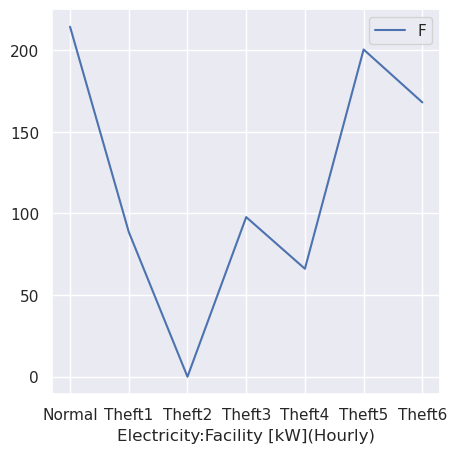

In [338]:
vs.plot(kind = 'line',figsize=(5, 5))
plt.legend('Facility')
plt.xlabel('Electricity:Facility [kW](Hourly)')

Text(0.5, 0, 'Fans:Facility [kW](Hourly)')

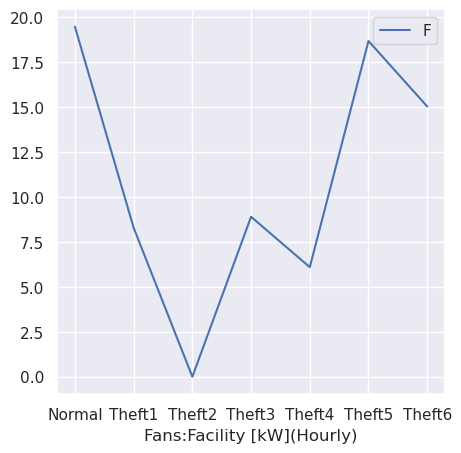

In [339]:
vs2 = df.groupby('theft')['Fans:Electricity [kW](Hourly)'].mean()
vs2.plot(kind = 'line',figsize=(5, 5))
plt.legend('Facility')
plt.xlabel('Fans:Facility [kW](Hourly)')

Text(0.5, 0, 'Heating:Electricity [kW](Hourly)')

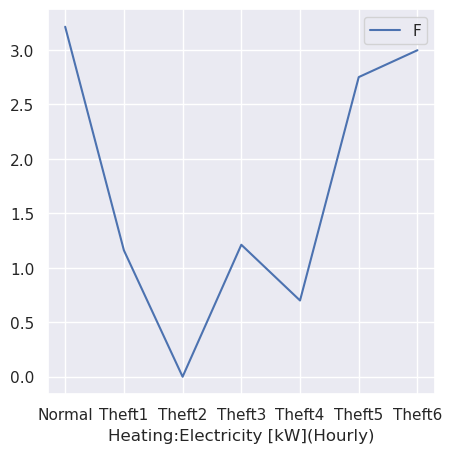

In [340]:
vs3 = df.groupby('theft')['Heating:Electricity [kW](Hourly)'].mean()
vs3.plot(kind = 'line',figsize=(5, 5))
plt.legend('Facility')
plt.xlabel('Heating:Electricity [kW](Hourly)')

Text(0.5, 0, 'Gas:Facility [kW](Hourly)')

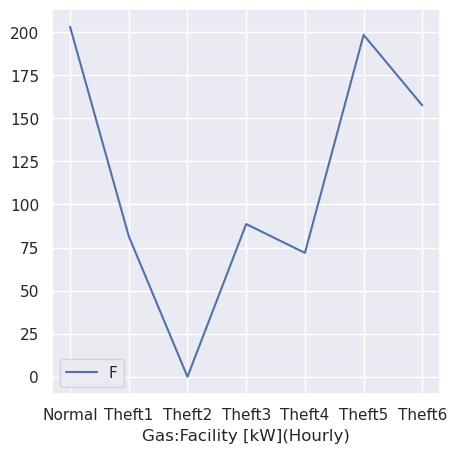

In [341]:
vs4 = df.groupby('theft')['Gas:Facility [kW](Hourly)'].mean()
vs4.plot(kind = 'line',figsize=(5, 5))
plt.legend('Facility')
plt.xlabel('Gas:Facility [kW](Hourly)')

Q3

In [342]:
df['Class'].unique()

array(['FullServiceRestaurant', 'Hospital', 'LargeHotel', 'LargeOffice',
       'MediumOffice', 'MidriseApartment', 'OutPatient', 'PrimarySchool',
       'QuickServiceRestaurant', 'SecondarySchool', 'SmallHotel',
       'SmallOffice'], dtype=object)

In [343]:
theft_list  = df['theft'].unique().tolist()
class_list  = df['Class'].unique().tolist()

In [344]:
le_theft = LabelEncoder()
le_class = LabelEncoder()

In [345]:
df['theft_n'] = le_theft.fit_transform(df['theft'])
df['class_n'] = le_class.fit_transform(df['Class'])

In [346]:
print(theft_list)

['Normal', 'Theft5', 'Theft6', 'Theft2', 'Theft3', 'Theft4', 'Theft1']


In [347]:
df.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft,theft_n,class_n
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal,0,0
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0,0
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0,0
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal,0,0
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal,0,0


In [348]:
df.drop('theft',axis = 1,inplace =True)
df.drop('Class',axis = 1,inplace =True)

In [349]:
df.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),theft_n,class_n
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,0,0
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0,0
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0,0
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,0,0
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0,0


In [350]:
X  = df.drop('theft_n',axis = 1)

In [351]:
X.head()

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),class_n
0,0,22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,0
1,1,14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0
2,2,14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0
3,3,14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,0
4,4,14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,0


In [352]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: theft_n, Length: 100000, dtype: int64

Q8

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2, random_state = 42)

In [354]:
kmeans = KMeans(n_clusters=8,random_state=0).fit(X)
X['cluster'] = kmeans.labels_


In [355]:
x_pca=PCA(n_components=5).fit_transform(X)

In [356]:
cols = df.columns.tolist()

Text(0.5, 0, 'Columns segmentation based on eigenvalues using PCA')

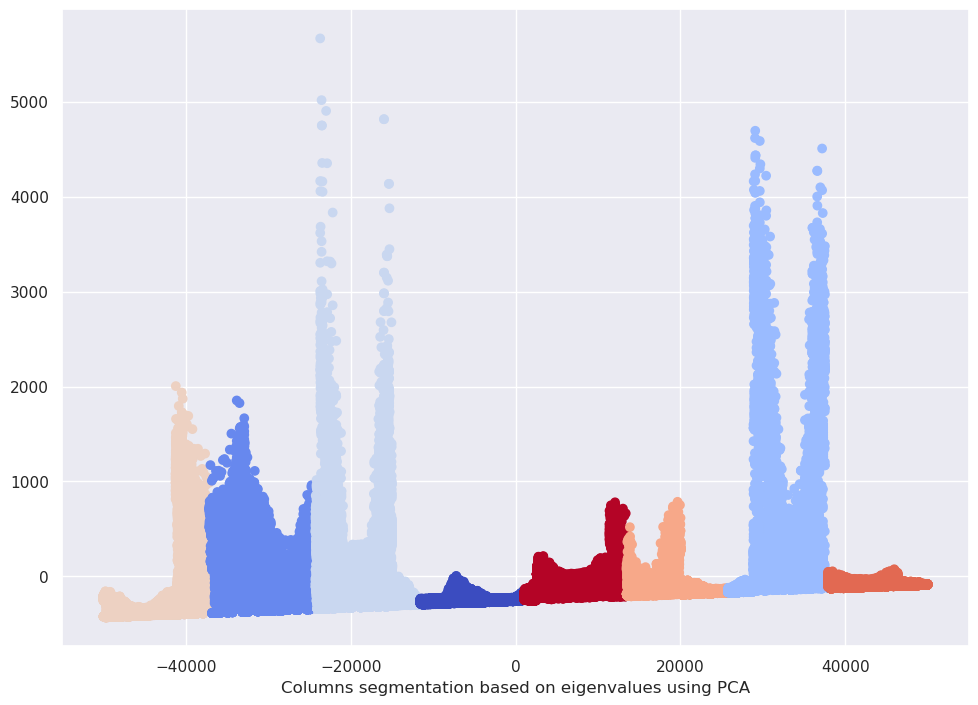

In [357]:
plt.scatter(x_pca[:,0],x_pca[:,1],c  = X['cluster'],cmap = 'coolwarm')
plt.xlabel("Columns segmentation based on eigenvalues using PCA")

In [358]:
#fea = x_pca.get_feature_names_out()

Q5

In [359]:
correlation_matrix = df.corr()
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

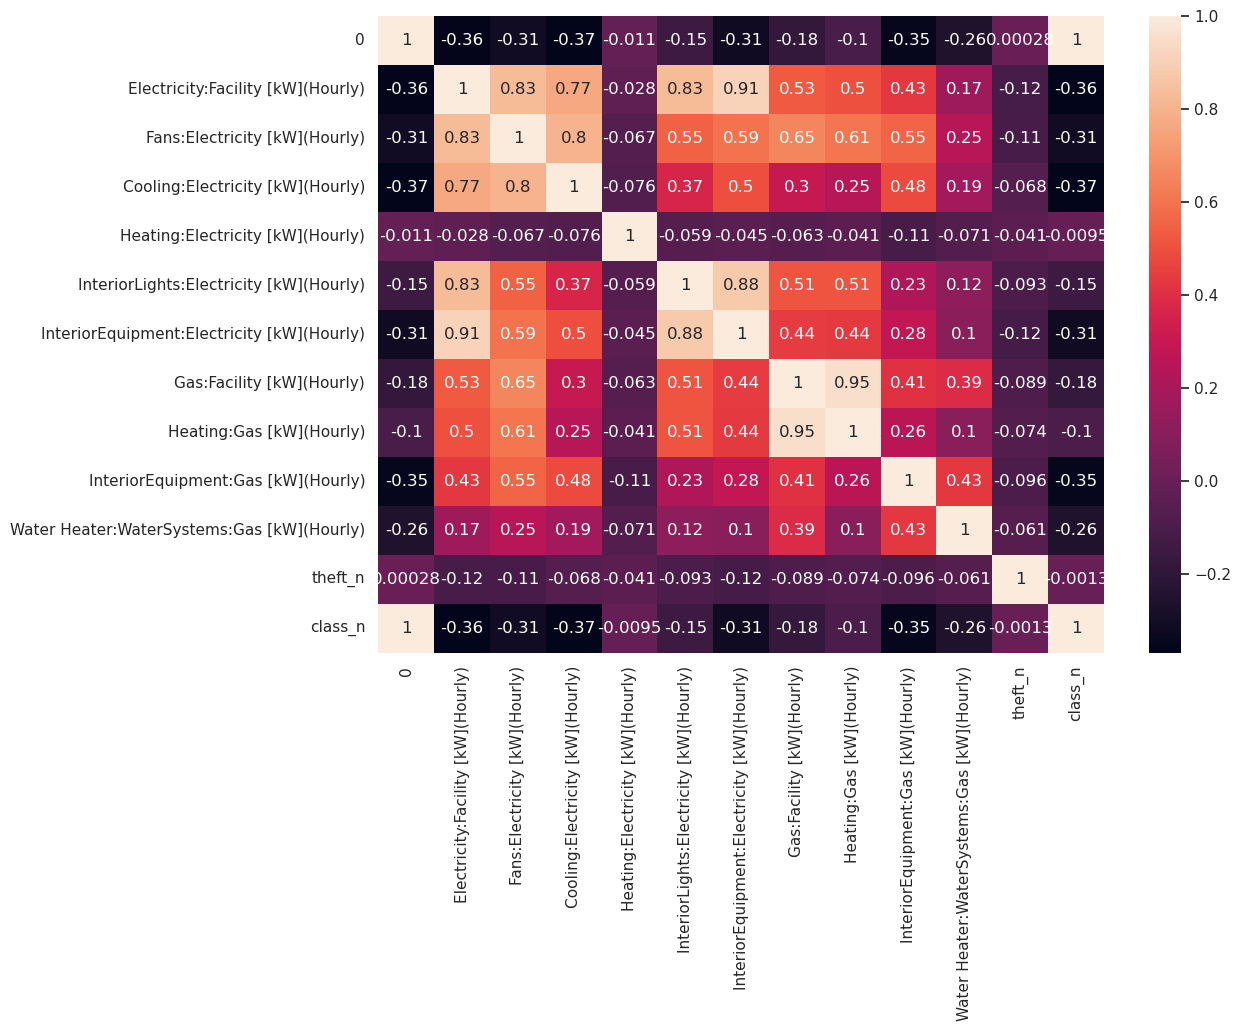

In [360]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Q6

In [361]:
from sklearn.tree import DecisionTreeClassifier


In [362]:
tre = DecisionTreeClassifier()
tre.fit(X_train, y_train)
pred1 = tre.predict(X_test)

In [363]:
print(accuracy_score(y_test,pred1))

0.826075


In [364]:
#disp = RocCurveDisplay.from_predictions(y_test,pred1)

In [365]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

In [367]:
print(accuracy_score(y_test,pred2))

0.861025


In [368]:
#disp = RocCurveDisplay.from_predictions(y_test,pred3)

In [369]:
from sklearn.svm import SVC

In [370]:
sv = SVC()
sv.fit(X_train, y_train)
pred3 = sv.predict(X_test)

In [371]:
print(accuracy_score(y_test,pred3))

0.5913


Q7

<BarContainer object of 3 artists>

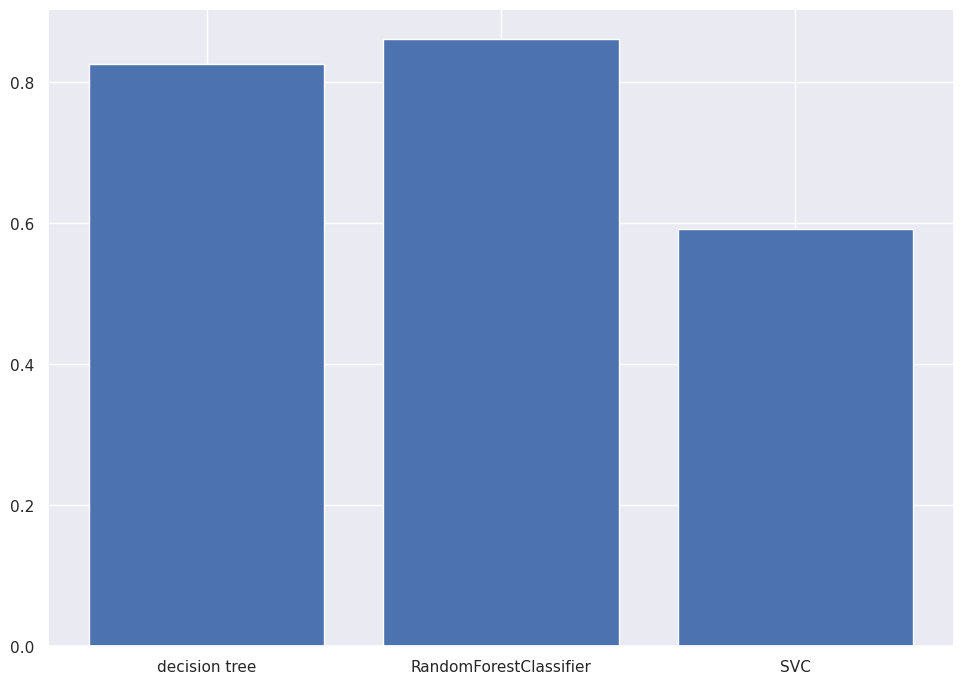

In [372]:
plt.bar(['decision tree','RandomForestClassifier','SVC'],[accuracy_score(y_test,pred1),accuracy_score(y_test,pred2),accuracy_score(y_test,pred3)])

In [373]:
importances = rf.feature_importances_

In [374]:
print(X.columns)

Index(['0', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'class_n', 'cluster'],
      dtype='object')


Q9,11

<BarContainer object of 12 artists>

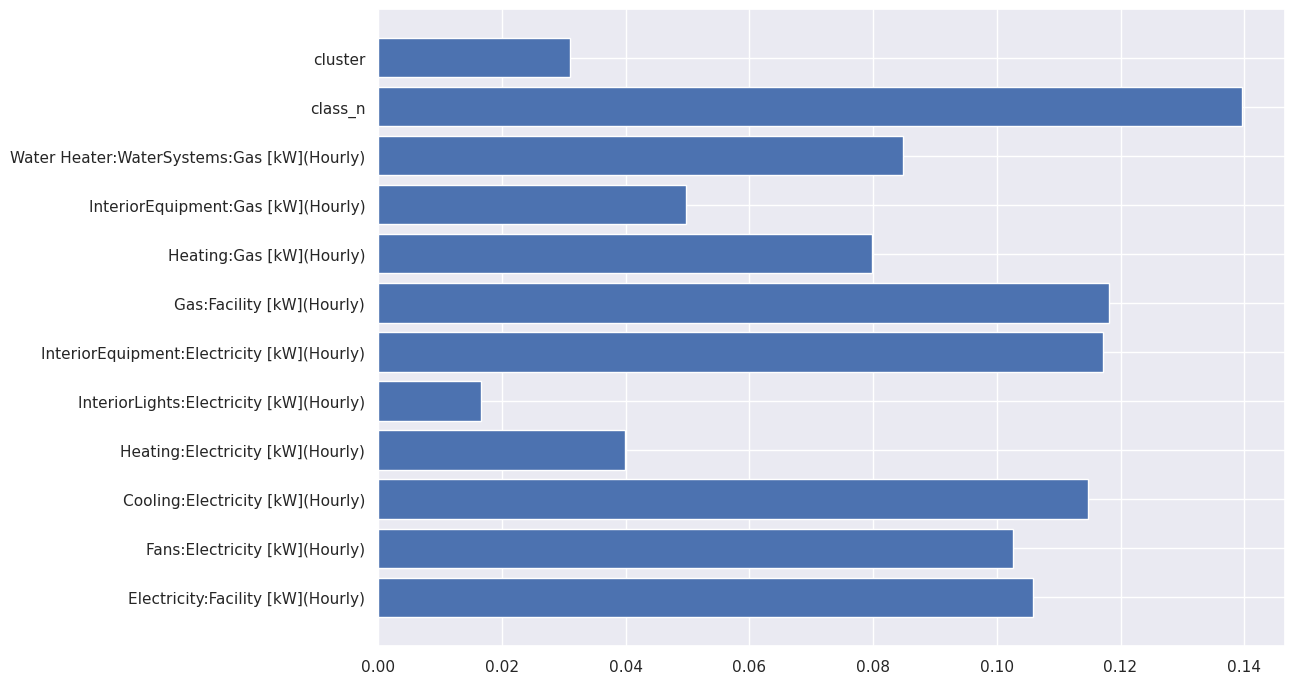

In [375]:
plt.barh(['Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'class_n', 'cluster'], importances, align='center')

Q10
We find from using random forest classifier that the feature of most importance in dataset is class_n meaning the type of theft commited. from model plots we find that random forest classifier best fits.